任务3 - 建模（2天）
用逻辑回归、svm和决策树；随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。（不需要考虑模型调参）  
任务4 - 模型评估（2天）
记录5个模型（逻辑回归、SVM、决策树、随机森林、XGBoost）关于accuracy、precision，recall和F1-score、auc值的评分表格，并画出ROC曲线。

### 准备好预处理好的数据

In [1]:
import pickle
with open('feature.pkl','rb') as f:
    X = pickle.load(f, encoding = 'gbk')

In [2]:
with open('label.pkl','rb') as f:
    y = pickle.load(f)

In [3]:
print(X.shape)
y.shape

(3983, 53)


(3983,)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 2018)

### 模型训练并评估
- LR
- DT
- RF
- xgb
- svm

#### lr

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
! python model_metrics.py

In [8]:
from model_metrics import model_metrics
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7378 测试集： 0.7699
[精准率] 训练集： 0.0000 测试集： 0.7699
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.5700 测试集： 0.5905


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

[准确率] 训练集： 0.8049 测试集： 0.7364
[精准率] 训练集： 0.6609 测试集： 0.8201
[召回率] 训练集： 0.5253 测试集： 0.3818
[f1-score] 训练集： 0.5854 测试集： 0.4000
[auc值] 训练集： 0.8011 测试集： 0.7045


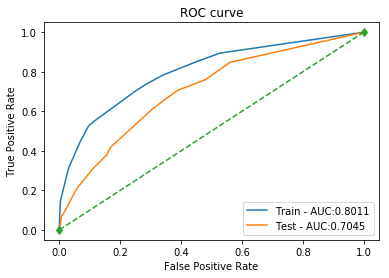

In [10]:
model_metrics(dt,X_train,X_test, y_train, y_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2018)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=True, random_state=2018, verbose=0, warm_start=False)

[准确率] 训练集： 0.8311 测试集： 0.7908
[精准率] 训练集： 0.8533 测试集： 0.8148
[召回率] 训练集： 0.4295 测试集： 0.2836
[f1-score] 训练集： 0.5714 测试集： 0.3842
[auc值] 训练集： 0.9045 测试集： 0.7645


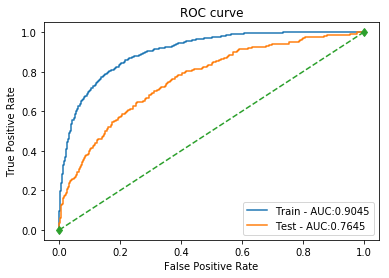

In [12]:
model_metrics(rf, X_train, X_test, y_train, y_test)

In [13]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

[准确率] 训练集： 0.8669 测试集： 0.7975
[精准率] 训练集： 0.8704 测试集： 0.8304
[召回率] 训练集： 0.5787 测试集： 0.3673
[f1-score] 训练集： 0.6952 测试集： 0.4550
[auc值] 训练集： 0.9196 测试集： 0.7744


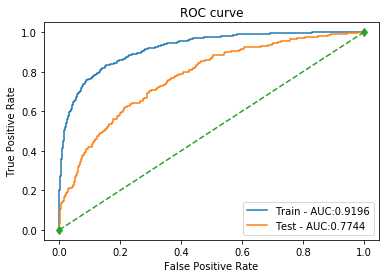

In [14]:
model_metrics(xgb,X_train, X_test, y_train, y_test)

In [15]:
from sklearn import svm
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

[准确率] 训练集： 0.2622 测试集： 0.2301
[精准率] 训练集： 0.2622 测试集： 0.0000
[召回率] 训练集： 1.0000 测试集： 1.0000
[f1-score] 训练集： 0.4155 测试集： 0.3741
[auc值] 训练集： 0.5000 测试集： 0.5000


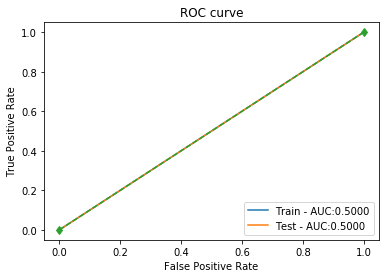

In [16]:
model_metrics(svm_poly,X_train, X_test, y_train, y_test)

[准确率] 训练集： 1.0000 测试集： 0.7699
[精准率] 训练集： 1.0000 测试集： 0.7699
[召回率] 训练集： 1.0000 测试集： 0.0000
[f1-score] 训练集： 1.0000 测试集： 0.0000
[auc值] 训练集： 0.0000 测试集： 0.5000


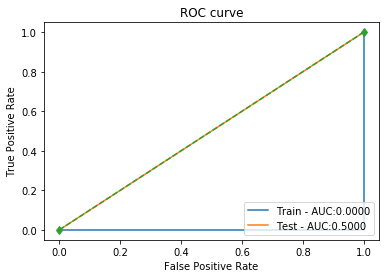

In [17]:
model_metrics(svm_rbf,X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7378 测试集： 0.7699
[精准率] 训练集： 0.0000 测试集： 0.7699
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.5000 测试集： 0.5000


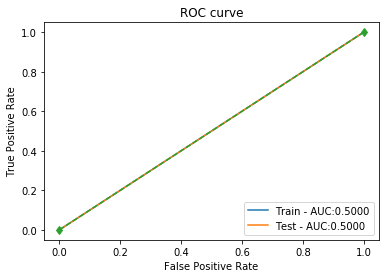

In [18]:
model_metrics(svm_sigmoid,X_train, X_test, y_train, y_test)

不清楚为什么svm会是这样？